Youtube
reduce dimension of Youtube from 100 to 20
  - Topic '0': Strength=0.09387840328077003, Mean contribution=0.045
  - Topic '1': Strength=0.09609838965014442, Mean contribution=0.022
  - Topic '2': Strength=0.6801830422159186, Mean contribution=0.328
  - Topic '3': Strength=0.12984016485316685, Mean contribution=0.000
ite: 0.4999999999999999 	 rte: 0.3956377
mean Y0: 0.38679355368565077 	 mean Y1: 0.9009816843878976 causation: 0.5141881307022469
mean Y|T=0: 0.29128351149233983 	 mean Y|T=1: 0.9157452039839171 Association: 0.6244616924915773


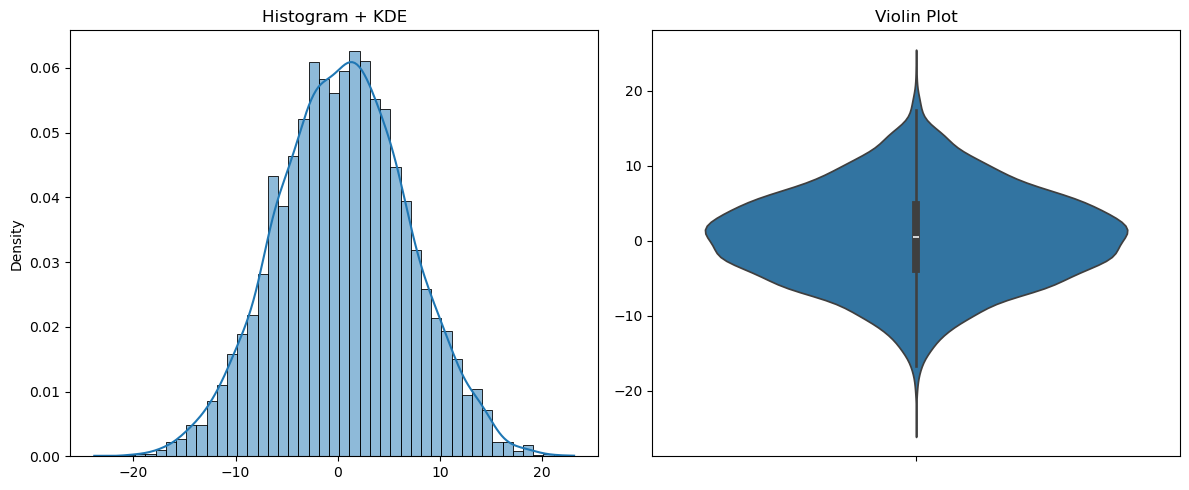

Syn
  - Topic '0': Strength=0.030678429613511516, Mean contribution=0.016
  - Topic '1': Strength=0.003758617082732919, Mean contribution=0.002
  - Topic '2': Strength=0.9595547839797586, Mean contribution=0.615
  - Topic '3': Strength=0.006008169323996939, Mean contribution=0.003
ite: 2.8946283389281424 	 rte: 0.63608235
mean Y0: 1.5661893561038507 	 mean Y1: 4.459675540580984 causation: 2.8934861844771333
mean Y|T=0: 2.2537685597847985 	 mean Y|T=1: 4.3420516133462685 Association: 2.08828305356147


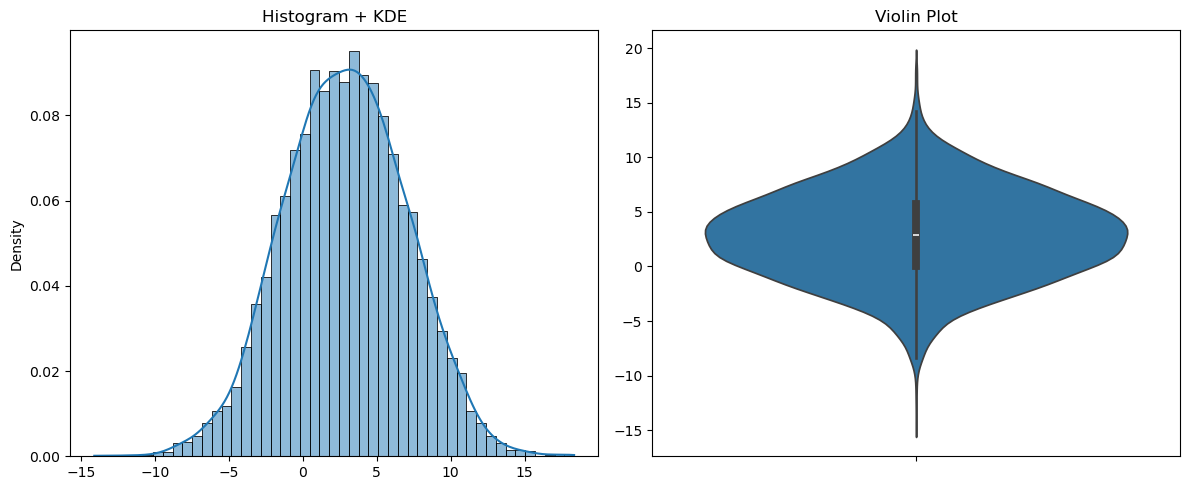

BlogCatalog


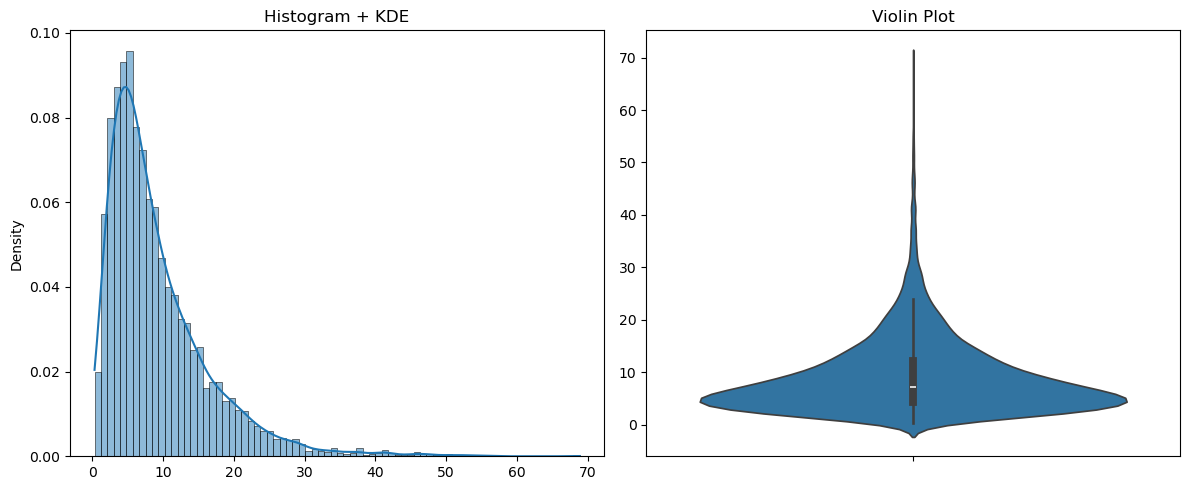

Flickr


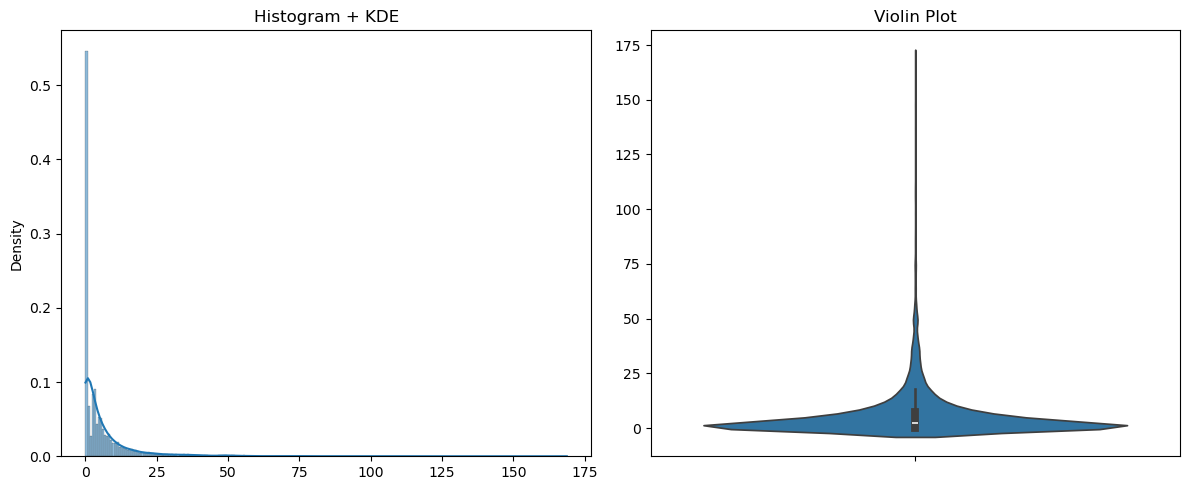

In [1]:
import torch
from data_util import *
import os
import argparse
from sim_relations import *

import matplotlib.pyplot as plt
import seaborn as sns

def visualize(ites):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Also adjusted figsize for better proportions
    
    # KDE plot
    sns.histplot(ites, kde=True, stat='density', ax=axes[0])
    axes[0].set_title('Histogram + KDE')
    
    # Violin plot
    sns.violinplot(y=ites, ax=axes[1])
    axes[1].set_title('Violin Plot')
    
    plt.tight_layout()
    plt.show()

def process_dataset(dataset, k, src_dir, n_attr, relation_sim=0, n_rel=1):
    """Process a single dataset configuration"""
    
    if "graph" in src_dir:
        X, A, T, Y, Y1, Y0 = load_multi_relational_data(dataset, k=k, root_dir=src_dir)
    elif "network" in src_dir:
        fn = os.path.join(src_dir, dataset, f"BlogCatalog{k}.mat" if "BlogCatalog" in dataset else f"Flickr{k}.mat")
        X, A, T, Y, Y1, Y0 = load_network_data(fn)
    else:
        raise Exception(f"No such directory {src_dir}")
    
    if dataset in ['BlogCatalog', 'Flickr']:
        ites = Y1 - Y0 
        visualize(ites)
        return

    # dimension reduction
    M = n_attr if X.shape[1] > n_attr else None 
    if M is not None and M < X.shape[1]:
        print(f"reduce dimension of {dataset} from {X.shape[1]} to {M}")
        X = reduce_dimensions_pca(X, n_components=M)

    # simulate relationships and outcomes based on X, relation_sim, n_rel
    if relation_sim > 0:
        X, A, T, Y, Y1, Y0 = sim_rel_outcomes(relation_sim, X, T, n_rel)
    
    ites = Y1 - Y0 
    visualize(ites) 
    


datasets = ['Youtube', 'Syn', 'BlogCatalog', 'Flickr']
src_dir = 'datasets'
k = 1
for dataset in datasets:
    print(dataset)
    src_dir = 'graph' if dataset in ['AMZS', "Syn", "Youtube"] else "network" #, "Flickr"
    n_rel = 4 if dataset in ["Syn", "Youtube"] else 1
    process_dataset(dataset, k, 'datasets/'+src_dir, n_attr=20, relation_sim=0.95, n_rel=4)